# Homelessness analysis

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

joined_df_P2 = pd.read_csv('C:/Users/lucyf/Coding/Homelessness-reasons/data/joined_df_P2.csv')
joined_df_A2P = pd.read_csv('C:/Users/lucyf/Coding/Homelessness-reasons/data/joined_df_A2P.csv')

In [218]:
display(joined_df_P2.head())
display(joined_df_A2P.head())

,ONS_code,local_authority,total_successful_prevention,total_PRS,PRS_sc,PRS_HMO,PRS_lodging,total_SRS,SRS_council,SRS_RP,SRS_supported,family,friends,owner_occupier,other,not_known,year,quarter,percentage_PRS_lodging,percentage_total_SRS,percentage_SRS_council,percentage_SRS_RP,percentage_SRS_supported,percentage_family,percentage_friends,percentage_owner_occupier,percentage_other,percentage_not_known
0,E07000223,Adur,5.0,2.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2022,3,0.00,0.40,0.00,0.20,0.20,0.00,0.00,0.00,0.00,0.20
1,E07000026,Allerdale,33.0,6.0,6.0,0.0,0.0,16.0,0.0,12.0,4.0,5.0,3.0,2.0,1.0,0.0,2022,3,0.00,0.48,0.00,0.36,0.12,0.15,0.09,0.06,0.03,0.00
2,E07000032,Amber Valley,65.0,14.0,13.0,0.0,1.0,46.0,1.0,34.0,11.0,3.0,1.0,0.0,1.0,0.0,2022,3,0.02,0.71,0.02,0.52,0.17,0.05,0.02,0.00,0.02,0.00
3,E07000224,Arun,54.0,35.0,30.0,4.0,1.0,14.0,4.0,4.0,6.0,2.0,0.0,0.0,1.0,2.0,2022,3,0.02,0.26,0.07,0.07,0.11,0.04,0.00,0.00,0.02,0.04
4,E07000170,Ashfield,14.0,3.0,3.0,0.0,0.0,10.0,6.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,2022,3,0.00,0.71,0.43,0.00,0.29,0.00,0.00,0.07,0.00,0.00


,ONS_code,local_authority,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,AST_LL_sell_relet,AST_disrepair_complaint,AST_illegal_eviction,AST_abandoned,AST_other,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other,year,quarter,percentage_AST_total,percentage_non_AST_private_let,percentage_family_friends,percentage_relationship_breakdown,percentage_domestic_violence,percentage_other_violence,percentage_social_total,percentage_supported_total,percentage_institution,percentage_asylum_accommodation,percentage_other
0,E07000223,Adur,9.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,3,0.67,0.00,0.22,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.00
1,E07000026,Allerdale,49.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,2.0,10.0,5.0,8.0,0.0,4.0,1.0,0.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,2022,3,0.27,0.04,0.20,0.10,0.16,0.00,0.08,0.02,0.02,0.00,0.10
2,E07000032,Amber Valley,63.0,21.0,1.0,0.0,0.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,6.0,1.0,23.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,1.0,0.0,2.0,2022,3,0.33,0.02,0.37,0.13,0.06,0.00,0.00,0.05,0.02,0.00,0.03
3,E07000224,Arun,84.0,40.0,3.0,0.0,0.0,0.0,0.0,1.0,34.0,0.0,0.0,0.0,2.0,2.0,24.0,4.0,0.0,2.0,6.0,4.0,0.0,2.0,4.0,0.0,1.0,3.0,0.0,1.0,1.0,2022,3,0.48,0.02,0.29,0.05,0.00,0.02,0.07,0.05,0.00,0.01,0.01
4,E07000170,Ashfield,51.0,31.0,1.0,0.0,0.0,0.0,1.0,0.0,24.0,1.0,0.0,0.0,4.0,1.0,6.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2022,3,0.61,0.02,0.12,0.06,0.14,0.00,0.00,0.00,0.02,0.00,0.04


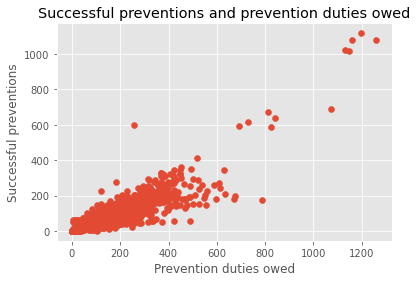

,ONS_code,local_authority,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,AST_LL_sell_relet,AST_disrepair_complaint,AST_illegal_eviction,AST_abandoned,AST_other,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other_x,year,quarter,percentage_AST_total,percentage_non_AST_private_let,percentage_family_friends,percentage_relationship_breakdown,percentage_domestic_violence,percentage_other_violence,percentage_social_total,percentage_supported_total,percentage_institution,percentage_asylum_accommodation,percentage_other_x,total_successful_prevention,total_PRS,PRS_sc,PRS_HMO,PRS_lodging,total_SRS,SRS_council,SRS_RP,SRS_supported,family,friends,owner_occupier,other_y,not_known,percentage_PRS_lodging,percentage_total_SRS,percentage_SRS_council,percentage_SRS_RP,percentage_SRS_supported,percentage_family,percentage_friends,percentage_owner_occupier,percentage_other_y,percentage_not_known,proportion_prevented
3122,E08000025,Birmingham,258.0,19.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,11.0,5.0,120.0,10.0,21.0,13.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,3.0,2.0,0.0,63.0,2020,1,0.07,0.02,0.47,0.04,0.08,0.05,0.0,0.02,0.01,0.0,0.24,599.0,338.0,265.0,72.0,1.0,88.0,37.0,22.0,29.0,53.0,15.0,3.0,76.0,26.0,0.0,0.15,0.06,0.04,0.05,0.09,0.03,0.01,0.13,0.04,2.321705


,ONS_code,local_authority,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,AST_LL_sell_relet,AST_disrepair_complaint,AST_illegal_eviction,AST_abandoned,AST_other,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other_x,year,quarter,percentage_AST_total,percentage_non_AST_private_let,percentage_family_friends,percentage_relationship_breakdown,percentage_domestic_violence,percentage_other_violence,percentage_social_total,percentage_supported_total,percentage_institution,percentage_asylum_accommodation,percentage_other_x,total_successful_prevention,total_PRS,PRS_sc,PRS_HMO,PRS_lodging,total_SRS,SRS_council,SRS_RP,SRS_supported,family,friends,owner_occupier,other_y,not_known,percentage_PRS_lodging,percentage_total_SRS,percentage_SRS_council,percentage_SRS_RP,percentage_SRS_supported,percentage_family,percentage_friends,percentage_owner_occupier,percentage_other_y,percentage_not_known,proportion_prevented
143,E08000035,Leeds,810.0,190.0,5.0,0.0,5.0,3.0,5.0,3.0,139.0,0.0,3.0,2.0,25.0,7.0,293.0,45.0,121.0,13.0,8.0,1.0,2.0,5.0,35.0,0.0,5.0,30.0,37.0,42.0,19.0,2022,3,0.23,0.01,0.36,0.06,0.15,0.02,0.01,0.04,0.05,0.05,0.02,670.0,154.0,140.0,11.0,3.0,133.0,59.0,8.0,66.0,247.0,123.0,3.0,6.0,4.0,0.00,0.20,0.09,0.01,0.10,0.37,0.18,0.00,0.01,0.01,0.827160
452,E08000035,Leeds,826.0,225.0,8.0,2.0,3.0,3.0,7.0,3.0,161.0,3.0,2.0,6.0,27.0,8.0,295.0,54.0,81.0,22.0,12.0,4.0,3.0,5.0,48.0,2.0,4.0,42.0,37.0,25.0,19.0,2022,2,0.27,0.01,0.36,0.07,0.10,0.03,0.01,0.06,0.04,0.03,0.02,590.0,145.0,130.0,12.0,3.0,118.0,35.0,7.0,76.0,213.0,102.0,3.0,6.0,3.0,0.01,0.20,0.06,0.01,0.13,0.36,0.17,0.01,0.01,0.01,0.714286
761,E08000035,Leeds,841.0,217.0,7.0,4.0,1.0,1.0,9.0,2.0,164.0,3.0,4.0,2.0,20.0,22.0,255.0,69.0,115.0,32.0,10.0,3.0,1.0,6.0,41.0,3.0,6.0,32.0,36.0,22.0,22.0,2022,1,0.26,0.03,0.30,0.08,0.14,0.04,0.01,0.05,0.04,0.03,0.03,636.0,173.0,155.0,18.0,0.0,151.0,60.0,8.0,83.0,187.0,115.0,5.0,3.0,2.0,0.00,0.24,0.09,0.01,0.13,0.29,0.18,0.01,0.00,0.00,0.756243
1070,E08000035,Leeds,1072.0,245.0,3.0,1.0,2.0,1.0,7.0,2.0,192.0,11.0,10.0,2.0,14.0,43.0,341.0,81.0,171.0,29.0,17.0,8.0,1.0,8.0,60.0,3.0,11.0,46.0,22.0,24.0,39.0,2021,4,0.23,0.04,0.32,0.08,0.16,0.03,0.02,0.06,0.02,0.02,0.04,687.0,211.0,189.0,21.0,1.0,147.0,66.0,11.0,70.0,206.0,108.0,3.0,12.0,0.0,0.00,0.21,0.10,0.02,0.10,0.30,0.16,0.00,0.02,0.00,0.640858
1081,E08000003,Manchester,787.0,260.0,7.0,2.0,2.0,3.0,17.0,5.0,171.0,0.0,0.0,9.0,44.0,12.0,150.0,20.0,57.0,11.0,170.0,158.0,2.0,10.0,19.0,3.0,7.0,9.0,8.0,21.0,59.0,2021,4,0.33,0.02,0.19,0.03,0.07,0.01,0.22,0.02,0.01,0.03,0.07,174.0,123.0,114.0,8.0,1.0,40.0,13.0,15.0,12.0,7.0,2.0,0.0,1.0,1.0,0.01,0.23,0.07,0.09,0.07,0.04,0.01,0.00,0.01,0.01,0.221093
1997,E08000035,Leeds,1130.0,191.0,6.0,1.0,5.0,1.0,22.0,8.0,114.0,9.0,8.0,8.0,9.0,19.0,484.0,96.0,143.0,63.0,21.0,8.0,3.0,10.0,37.0,0.0,8.0,29.0,9.0,24.0,43.0,2021,1,0.17,0.02,0.43,0.08,0.13,0.06,0.02,0.03,0.01,0.02,0.04,1020.0,227.0,209.0,16.0,2.0,169.0,75.0,11.0,83.0,392.0,208.0,8.0,10.0,6.0,0.00,0.17,0.07,0.01,0.08,0.38,0.20,0.01,0.01,0.01,0.902655
2310,E08000035,Leeds,1197.0,222.0,9.0,3.0,12.0,1.0,13.0,6.0,140.0,12.0,4.0,15.0,7.0,9.0,511.0,106.0,152.0,50.0,17.0,5.0,3.0,9.0,36.0,0.0,3.0,33.0,17.0,39.0,38.0,2020,4,0.19,0.01,0.43,0.09,0.13,0.04,0.01,0.03,0.01,0.03,0.03,1117.0,263.0,251.0,10.0,2.0,172.0,64.0,19.0,89.0,439.0,206.0,14.0,18.0,5.0,0.00,0.15,0.06,0.02,0.08,0.39,0.18,0.01,0.02,0.00,0.933166
2624,E08000035,Leeds,1161.0,161.0,8.0,0.0,7.0,3.0,2.0,1.0,113.0,6.0,9.0,11.0,1.0,20.0,497.0,101.0,144.0,64.0,23.0,8.0,5.0,10.0,69.0,2.0,9.0,58.0,6.0,32.0,44.0,2020,3,0.14,0.02,0.43,0.09,0.12,0.06,0.02,0.06,0.01,0.03,0.04,1077.0,237.0,214.0,13.0,10.0,205.0,79.0,8.0,118.0,395.0,203.0,15.0,5.0,17.0,0.01

In [225]:
display(df.head(20))

,ONS_code,local_authority,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,AST_LL_sell_relet,AST_disrepair_complaint,AST_illegal_eviction,AST_abandoned,AST_other,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other_x,year,quarter,percentage_AST_total,percentage_non_AST_private_let,percentage_family_friends,percentage_relationship_breakdown,percentage_domestic_violence,percentage_other_violence,percentage_social_total,percentage_supported_total,percentage_institution,percentage_asylum_accommodation,percentage_other_x,total_successful_prevention,total_PRS,PRS_sc,PRS_HMO,PRS_lodging,total_SRS,SRS_council,SRS_RP,SRS_supported,family,friends,owner_occupier,other_y,not_known,percentage_PRS_lodging,percentage_total_SRS,percentage_SRS_council,percentage_SRS_RP,percentage_SRS_supported,percentage_family,percentage_friends,percentage_owner_occupier,percentage_other_y,percentage_not_known,proportion_prevented,region_code,region_name,median_age,population_density,number_unemployed,percent_unemployed,deprivation_score
0,E07000223,Adur,9.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,3,0.67,0.00,0.22,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.00,5.0,2.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.40,0.00,0.20,0.20,0.00,0.00,0.00,0.00,0.20,0.555556,E12000008,South East,45.7,1529.0,1100.0,3.4,17.6
1,E07000026,Allerdale,49.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,2.0,10.0,5.0,8.0,0.0,4.0,1.0,0.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,2022,3,0.27,0.04,0.20,0.10,0.16,0.00,0.08,0.02,0.02,0.00,0.10,33.0,6.0,6.0,0.0,0.0,16.0,0.0,12.0,4.0,5.0,3.0,2.0,1.0,0.0,0.00,0.48,0.00,0.36,0.12,0.15,0.09,0.06,0.03,0.00,0.673469,E12000002,North West,48.3,79.0,1300.0,2.6,22.9
2,E07000032,Amber Valley,63.0,21.0,1.0,0.0,0.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,6.0,1.0,23.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,1.0,0.0,2.0,2022,3,0.33,0.02,0.37,0.13,0.06,0.00,0.00,0.05,0.02,0.00,0.03,65.0,14.0,13.0,0.0,1.0,46.0,1.0,34.0,11.0,3.0,1.0,0.0,1.0,0.0,0.02,0.71,0.02,0.52,0.17,0.05,0.02,0.00,0.02,0.00,1.031746,E12000004,East Midlands,46.1,483.0,2000.0,2.8,18.0
3,E07000224,Arun,84.0,40.0,3.0,0.0,0.0,0.0,0.0,1.0,34.0,0.0,0.0,0.0,2.0,2.0,24.0,4.0,0.0,2.0,6.0,4.0,0.0,2.0,4.0,0.0,1.0,3.0,0.0,1.0,1.0,2022,3,0.48,0.02,0.29,0.05,0.00,0.02,0.07,0.05,0.00,0.01,0.01,54.0,35.0,30.0,4.0,1.0,14.0,4.0,4.0,6.0,2.0,0.0,0.0,1.0,2.0,0.02,0.26,0.07,0.07,0.11,0.04,0.00,0.00,0.02,0.04,0.642857,E12000008,South East,49.7,727.0,2200.0,3.0,18.6
4,E07000170,Ashfield,51.0,31.0,1.0,0.0,0.0,0.0,1.0,0.0,24.0,1.0,0.0,0.0,4.0,1.0,6.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2022,3,0.61,0.02,0.12,0.06,0.14,0.00,0.00,0.00,0.02,0.00,0.04,14.0,3.0,3.0,0.0,0.0,10.0,6.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.00,0.71,0.43,0.00,0.29,0.00,0.00,0.07,0.00,0.00,0.274510,E12000004,East Midlands,41.9,1168.0,2700.0,4.2,26.3
5,E07000105,Ashford,86.0,38.0,1.0,2.0,1.0,0.0,1.0,1.0,27.0,2.0,0.0,0.0,3.0,4.0,22.0,6.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,2022,3,0.44,0.05,0.26,0.07,0.07,0.00,0.01,0.00,0.02,0.00,0.08,23.0,16.0,12.0,3.0,1.0,2.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.04,0.09,0.00,0.00,0.09,0.22,0.00,0.00,0.00,0.00,0.267442,E12000008,South East,42.0,224.0,2700.0,4.0,18.5
6,E07000200,Babergh,55.0,17.0,3.0,0.0,1.0,0.0,1.0,1.0,7.0,0.0,0.0,0.0,4.0,2.0,9.0,5.0,8.0,0.0,9.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2022,3,0.31,0.04,0.16,0.09,0.15,0.00,0.16,0.00,0.00,0.00,0.09,38.0,12.0,11.0,1.0,0.0,25.0,16.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.66,0.42,0.24,0.00,0.00,0.00,0.00,0.00,0.03,0.690909,E12000006,East,48.8,155.0,1200.0,2.8,14.3
7,E09000002,Barking & Dagenham,159.0,45.0,1.0,0.0,0.0,2.0,7.0,1.0,30.0,0.0,

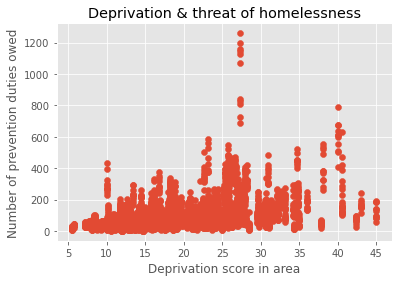

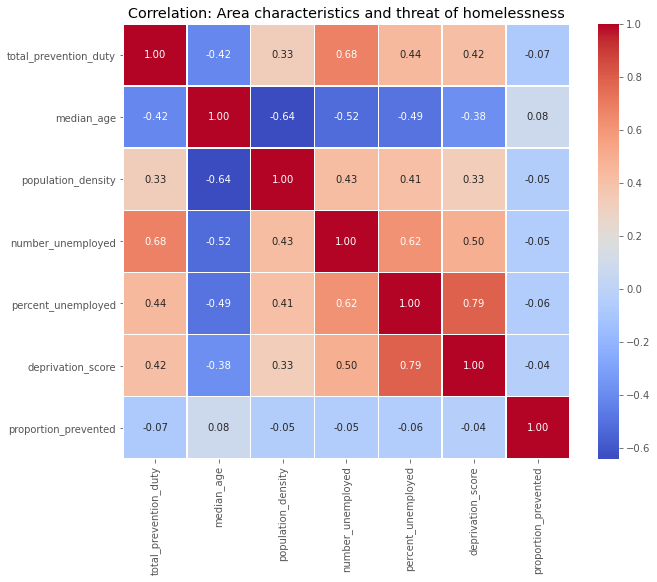

,ONS_code,local_authority,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,AST_LL_sell_relet,AST_disrepair_complaint,AST_illegal_eviction,AST_abandoned,AST_other,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other_x,year,quarter,total_successful_prevention,total_PRS,PRS_sc,PRS_HMO,PRS_lodging,total_SRS,SRS_council,SRS_RP,SRS_supported,family,friends,owner_occupier,other_y,not_known,proportion_prevented,region_code,region_name,median_age,population_density,number_unemployed,percent_unemployed,deprivation_score,HPG_grant
3200,E07000208,Epsom & Ewell,8.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2020,1,14.0,9.0,9.0,0.0,0.0,3.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.750000,E12000008,South East,41.5,2366.0,900.0,2.2,8.8,NaN
393,E07000193,East Staffordshire,15.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2022,2,12.0,6.0,6.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.800000,E12000005,West Midlands,41.9,309.0,1700.0,2.6,19.0,276307.0
1192,E07000083,Tewkesbury,65.0,36.0,0.0,0.0,0.0,0.0,1.0,0.0,33.0,0.0,0.0,0.0,2.0,2.0,14.0,1.0,4.0,1.0,5.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2021,4,34.0,10.0,9.0,0.0,1.0,23.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,0.523077,E12000009,South West,44.5,229.0,1500.0,3.2,12.1,210890.0
640,E08000001,Bolton,338.0,86.0,0.0,1.0,2.0,1.0,5.0,5.0,52.0,0.0,2.0,2.0,16.0,38.0,90.0,20.0,51.0,12.0,14.0,7.0,1.0,6.0,6.0,1.0,2.0,3.0,1.0,8.0,12.0,2022,1,158.0,26.0,26.0,0.0,0.0,121.0,1.0,73.0,47.0,6.0,1.0,2.0,1.0,1.0,0.467456,E12000002,North West,38.9,2057.0,6600.0,5.0,30.7,700539.0
2213,E07000070,Chelmsford,96.0,17.0,1.0,0.0,1.0,0.0,2.0,1.0,7.0,0.0,0.0,0.0,5.0,2.0,32.0,10.0,9.0,0.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2020,4,53.0,20.0,18.0,2.0,0.0,14.0,1.0,11.0,2.0,18.0,1.0,0.0,0.0,0.0,0.552083,E12000006,East,41.6,527.0,2400.0,2.5,12.2,NaN
3091,E08000010,Wigan,172.0,44.0,1.0,0.0,1.0,0.0,5.0,2.0,30.0,1.0,0.0,0.0,4.0,5.0,37.0,14.0,28.0,2.0,1.0,0.0,0.0,1.0,6.0,0.0,4.0,2.0,2.0,3.0,30.0,2020,2,61.0,12.0,11.0,1.0,0.0,42.0,36.0,2.0,4.0,4.0,0.0,0.0,3.0,0.0,0.354651,E12000002,North West,42.1,1747.0,5800.0,3.5,25.7,NaN
2405,E07000196,South Staffordshire,14.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.142857,E12000005,West Midlands,48.0,276.0,1600.0,2.8,13.1,NaN
1213,E07000241,Welwyn Hatfield,137.0,20.0,1.0,0.0,0.0,0.0,1.0,2.0,12.0,0.0,0.0,0.0,4.0,12.0,36.0,8.0,10.0,2.0,7.0,0.0,0.0,7.0,20.0,1.0,6.0,13.0,9.0,0.0,13.0,2021,4,55.0,19.0,11.0,5.0,3.0,26.0,10.0,3.0,13.0,7.0,2.0,0.0,0.0,1.0,0.401460,E12000006,East,35.7,950.0,2000.0,2.9,14.2,491054.0
281,E06000007,Warrington,174.0,32.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0,0.0,1.0,0.0,4.0,9.0,48.0,6.0,47.0,0.0,13.0,4.0,5.0,4.0,8.0,0.0,2.0,6.0,5.0,2.0,4.0,2022,3,85.0,19.0,18.0,0.0,1.0,57.0,0.0,46.0,11.0,2.0,0.0,4.0,2.0,1.0,0.488506,E12000002,North West,42.3,1163.0,3400.0,3.2,18.9,569265.0
2244,E07000040,East Devon,121.0,27.0,1.0,1.0,3.0,0.0,1.0,2.0,16.0,0.0,0.0,0.0,3.0,11.0,41.0,17.0,9.0,3.0,5.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,2020,4,71.0,40.0,33.0,5.0,2.0,26.0,12.0,11.0,3.0,2.0,1.0,0.0,2.0,0.0,0.586777,E12000009,South West,51.2,180.0,1600.0,2.3,12.8,NaN


In [235]:
df.to_csv('C:/Users/lucyf/Coding/Homelessness-reasons/data/master_df.csv')

In [239]:
df.isnull().sum()

ONS_code                               0
local_authority                        0
total_prevention_duty                  0
AST_total                              0
AST_arrears_budgeting                  0
AST_arrears_rent_increase              0
AST_arrears_employment_reduction       0
AST_arrears_benefit_reduction          0
AST_arrears_personal_circs             0
AST_breach                             0
AST_LL_sell_relet                      0
AST_disrepair_complaint                0
AST_illegal_eviction                   0
AST_abandoned                          0
AST_other                              0
non_AST_private_let                    0
family_friends                         0
relationship_breakdown                 0
domestic_violence                      0
other_violence                         0
social_total                           0
social_arrears                         0
social_breach                          0
social_other                           0
supported_total 

In [240]:
df.shape

(3419, 56)

In [244]:
df.describe()

,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,AST_LL_sell_relet,AST_disrepair_complaint,AST_illegal_eviction,AST_abandoned,AST_other,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other_x,year,quarter,total_successful_prevention,total_PRS,PRS_sc,PRS_HMO,PRS_lodging,total_SRS,SRS_council,SRS_RP,SRS_supported,family,friends,owner_occupier,other_y,not_known,proportion_prevented,median_age,population_density,number_unemployed,percent_unemployed,deprivation_score
count,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3404.000000,3383.000000,3383.000000,3383.000000,3383.000000,3383.000000
mean,103.836502,31.563323,1.852881,0.295116,0.895876,0.616847,1.932144,0.701960,19.588769,0.478210,0.253875,0.358584,4.581164,3.684411,28.914010,6.397777,8.235449,2.109389,5.107341,3.533489,0.421761,1.124305,3.247148,0.341913,1.152091,1.744370,1.926294,1.293361,11.366481,2020.903773,2.364434,55.745247,22.005557,19.154139,2.377303,0.477918,23.655162,5.930097,11.802866,5.925709,5.365019,1.655455,0.361802,1.123428,1.562738,0.576225,42.250399,1828.047295,3610.730121,3.618416,19.710848
std,107.970506,33.421554,3.986482,1.062862,1.633554,2.691364,2.791059,1.428345,21.156718,1.083566,0.750197,1.258834,6.972323,5.201625,36.431395,7.995117,12.691753,4.207710,11.486854,10.351614,1.052710,2.212270,6.625662,1.606681,3.377849,3.643191,4.424499,4.102147,16.792262,0.793357,1.068447,69.614753,28.202659,25.199147,4.203752,0.980662,26.905141,12.142709,16.372199,10.710881,18.944766,9.504243,1.061515,3.338251,10.541751,0.512624,5.096756,2679.121481,3564.085113,1.192062,7.975205
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.900000,25.000000,500.000000,1.500000,5.500000
25%,38.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2020.000000,1.000000,20.000000,7.000000,6.000000,0.000000,0.000000,7.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,38.400000,229.000000,1600.000000,2.700000,13.200000
50%,70.000000,21.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000,2.000000,2.000000,18.000000,4.000000,5.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000,2021.000000,2.000000,38.000000,14.000000,12.000000,1.000000,0.000000,16.000000,2.000000,6.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.538462,42.400000,750.000000,2200.000000,3.400000,18.200000
75%,129.000000,39.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,25.000000,1.000000,0.000000,0.000000,5.000000,5.000000,34.000000,8.000000,9.000000,2.000000,5.000000,3.00